## Neural Network Classification

In [ ]:
#make classification data and get it ready
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples

n_samples=1000

#create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42
                 )

len(X), len(y), type(X), type(y)

(1000, 1000, numpy.ndarray, numpy.ndarray)

In [ ]:
#visualize samples
print(f"first 5 samples of X : {X[:5]}")
print(f"first 5 samples of y : {y[:5]}")

first 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y : [1 1 1 1 0]


In [ ]:
#make Dataframe of the circles
import pandas as pd

circles=pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                       "y": y})

circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


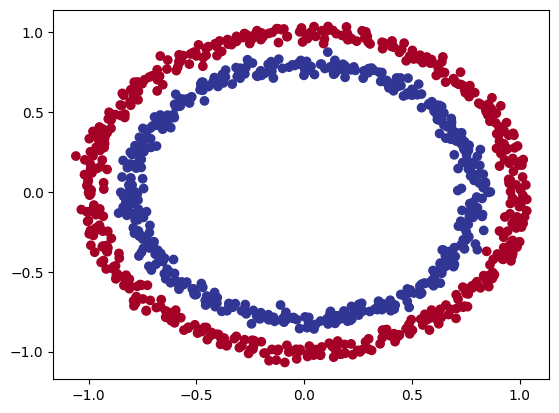

In [ ]:
#visualize the dataset
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

The data we are working on is commonly reffered to as a toy dataset, meaning a dataset that is small enough for us to experiment on but still sizable enough to work on the fundamentals of NN classification

In [ ]:
#check input and output shapes to avoid mismatch shape error, one of the most common in machine learning
X.shape, y.shape,

((1000, 2), (1000,))

In [ ]:
#view first example of features and labels
X_sample=X[0]
y_sample=y[0]
print(f"First sample values are {X_sample} for features and {y_sample} for labels")
print(f"First sample shapes are {X_sample.shape} for features and {y_sample.shape} for labels")

First sample values are [0.75424625 0.23148074] for features and 1 for labels
First sample shapes are (2,) for features and () for labels


## Turn our data into Tensors and split it into training and testing samples

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)


In [ ]:
#Split the data to training and testing
from sklearn.model_selection import train_test_split

#always go features first, then labels also always train first test after
X_train, X_test, y_train, y_test= train_test_split(X,y , test_size=0.2, random_state=42) #random_state has the same effect as random_seed only on scikit-learn code


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a Model

Now its time to build a model that classifies the red and blue dots

To do so we need :

1) to create device agnostic code so that the model can run on a GPU if there is one
2) Construct the model by subclassing nn.Module
3) Define a loss function and optimizer
4) Create a trainning and testing loop


In [ ]:
#import pytorch and nn
import torch
from torch import nn

#make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from sklearn import datasets

#Create the class of the model
class CircleModelV0(nn.Module):
     def __init__(self):
        super().__init__()
        #create 2 nn.Linear layers to handle the shapes of our data
        #if our data is of few dimensions and size 1 to 2 hidden layers shoud suffice
        # else 3 to 5 is recommended
        #out features number is selected at random but it has to match the next layer's in features number to prevent shape errors
        self.layer_1=nn.Linear(in_features=2, out_features=5) #takes 2 features and upscales to 5
        self.layer_2=nn.Linear(in_features=5, out_features=1) #takes the 5 features from the previous layer and outputs a single feature

        #define a forward() for the forward pass
        def forward(self, x):
            return self.layer_2(self.layer_1(x)) #x-> layer_1 -> layer_2 -> output


#instanciate an instance of the model class
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#lets replicate the model above using nn.Sequential
#one of the simplest ways to make a model but we should not try to replace subclassing with it in every occasion
model_0=nn.Sequential(nn.Linear(in_features=2, out_features=5),
                     nn.Linear(in_features=5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2522, -0.2638],
                      [-0.5654, -0.3606],
                      [ 0.1093,  0.6402],
                      [ 0.3217,  0.0376],
                      [ 0.2413,  0.1231]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5114, -0.4742, -0.3315, -0.2723,  0.1381], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2949, -0.0995,  0.1153,  0.3298, -0.0447]], device='cuda:0')),
             ('1.bias', tensor([0.2803], device='cuda:0'))])

In [ ]:
#make predictions
with torch.inference_mode(): #we use inference_mode to turn off gradience tracking
    untrained_preds=model_0(X_test.to(device))
print(f"length of untrained predictions {len(untrained_preds)},shape of untrained predictions {untrained_preds.shape}")
print(f"\nlength of test features {len(X_test)}, shape of test features {X_test.shape}")
print(f"\n first 10 predictions {torch.round(untrained_preds[:10].squeeze())}")
print(f"\n first 10 labels {y_test[:10]}")


length of untrained predictions 200,shape of untrained predictions torch.Size([200, 1])

length of test features 200, shape of test features torch.Size([200, 2])

 first 10 predictions tensor([-0., 0., -0., 0., 0., 0., 0., 0., -0., 0.], device='cuda:0')

 first 10 labels tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setting up loss function and optimizer
* For classification the loss function we need is binary cross entropy or categorical cross entropy
* L1Loss that calculates loss using MAE is typically used for regression
* For optimizers 2 of the most useful are SGD and Adam, however pytorch provides a lot of different built-in options

In [ ]:
#We use BCEWIthLogitsLoss() thats used for binary cross entropy
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2522, -0.2638],
                      [-0.5654, -0.3606],
                      [ 0.1093,  0.6402],
                      [ 0.3217,  0.0376],
                      [ 0.2413,  0.1231]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5114, -0.4742, -0.3315, -0.2723,  0.1381], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2949, -0.0995,  0.1153,  0.3298, -0.0447]], device='cuda:0')),
             ('1.bias', tensor([0.2803], device='cuda:0'))])

In [ ]:
import torch
#calculate prediction's accuracy - out of 100 examples what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct/len(y_pred))*100
    return accuracy

## A few notes on our model's output
Our model's outputs are going to be raw **logits**

In neural neworks any raw value that is later converted into a probability is called a Logit
its short for Logistic Unit

we go fron logits -> prediction probabilitites -> prediction labels

we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [ ]:
#view the first 5 outputs of the forward pass of our data
with torch.inference_mode():
    y_logits=model_0(X_test.to(device))

y_logits[:5]

tensor([[-0.0206],
        [ 0.0834],
        [-0.1374],
        [ 0.0119],
        [ 0.1096]], device='cuda:0')

In [ ]:
#need to convert the logits to look like the test predictions
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#we will use the sigmoid activation function that is used for output activation in binary classification
#on our model's logits to turn them into probabilities
y_probs=torch.sigmoid(y_logits)
y_probs[:5]


tensor([[0.4949],
        [0.5208],
        [0.4657],
        [0.5030],
        [0.5274]], device='cuda:0')

In [ ]:
#round them up to turn them into labels
#we perform a range-style rounding up menaing if prob>=0.5 then its of class 1 else its class 0
y_labels=torch.round(y_probs)
y_labels[:5]

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
y_train[:10]

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [ ]:
#make a training and testing loop

#set a manual seed to control the randomness
torch.manual_seed(42)

#set the epochs and device agnostic code
epochs=1000

X_train,y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#make training and evaluation loop
for epoch in range(epochs):
    #set the mode to training
    model_0.train()

    #forward pass
    y_logits = model_0(X_train).squeeze()

    #convert logits to probabilities
    #y_probs=torch.sigmoid(y_logits)

    #convert probabilities to predictions
    y_pred=torch.round(torch.sigmoid(y_logits))

    #calculate loss
    loss=loss_fn(y_logits #if loss_fn was BCELoss() prediction probabilitites should have been passed as input instead of logits
              , y_train)


    #calculate training accuracy
    acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

    #optimizer zero grad
    optimizer.zero_grad()

    #perform backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

    #set the mode to evaluation
    model_0.eval()

    #perform forward pass on testing data
    with torch.inference_mode():
        #forward pass
        y_test_logits = model_0(X_test).squeeze()

        #convert logits to probabilities
        y_test_probs=torch.sigmoid(y_test_logits)

        #convert probabilities to predictions
        y_test_pred=torch.round(y_test_probs)

        #calculate loss on testing predictions
        test_loss=loss_fn(y_test_logits, y_test)

        #calculate training accuracy
        test_acc=accuracy_fn(y_true=y_test, y_pred=y_test_pred)
    if epoch % 10 == 0 :
        print(f"epoch : {epoch}, training loss: {loss:.5f}, test loss: {test_loss:.5f}, accuracy: {acc:.2f}, test accuracy : {test_acc:.2f} ")


epoch : 0, training loss: 0.69558, test loss: 0.69960, accuracy: 51.25, test accuracy : 49.00 
epoch : 10, training loss: 0.69511, test loss: 0.69881, accuracy: 51.00, test accuracy : 49.00 
epoch : 20, training loss: 0.69478, test loss: 0.69821, accuracy: 50.50, test accuracy : 49.00 
epoch : 30, training loss: 0.69453, test loss: 0.69773, accuracy: 50.88, test accuracy : 49.00 
epoch : 40, training loss: 0.69433, test loss: 0.69732, accuracy: 50.25, test accuracy : 48.00 
epoch : 50, training loss: 0.69416, test loss: 0.69698, accuracy: 50.38, test accuracy : 48.00 
epoch : 60, training loss: 0.69402, test loss: 0.69669, accuracy: 50.25, test accuracy : 48.50 
epoch : 70, training loss: 0.69390, test loss: 0.69644, accuracy: 50.25, test accuracy : 48.50 
epoch : 80, training loss: 0.69380, test loss: 0.69622, accuracy: 50.62, test accuracy : 48.50 
epoch : 90, training loss: 0.69371, test loss: 0.69603, accuracy: 50.50, test accuracy : 48.50 
epoch : 100, training loss: 0.69363, test

from the metrics, it looks like our model is not learning anything.

In order to inspect the issue we must make some predictions and then visualize them

To do so, we are going to import a function called **plot_decision_boundary**

In [ ]:
import requests
from pathlib import Path

#download helper functions from pytorch repo
if Path("helper_functions.py").is_file():
    print("file already exists")
    print(Path("helper_functions.py"))

else:
    print("Downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb")as f:
        f.write(request.content)

from helper_functions import *


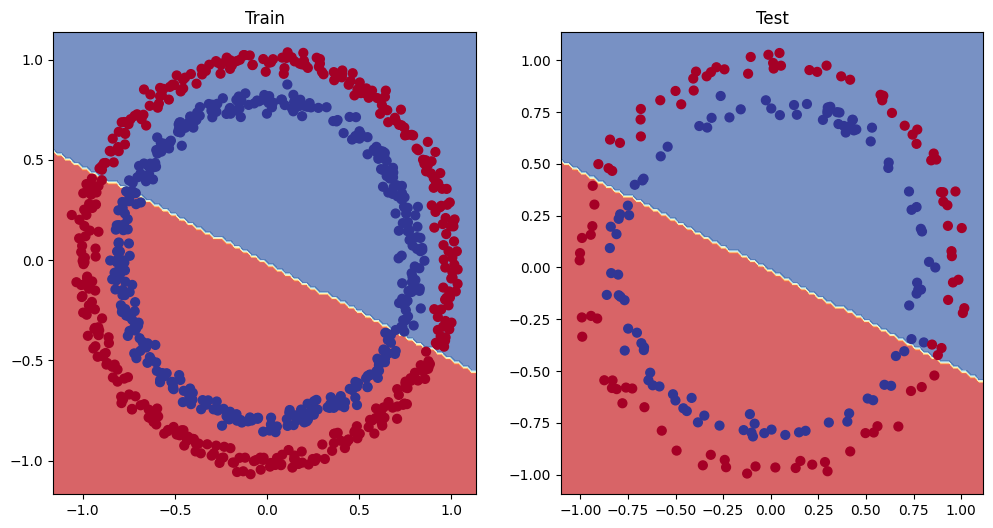

In [ ]:
#plot the decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


 **we come to the conclusion that the model does not make accurate predictions because we implement linear layers on the neural network meaning that the goal for the model is to try and draw a straight line, but since our data has the shape of a circle linearity wont work as well as it did last time **

# Improving a Model
Ways we can improve our model's predictions :
* Add more layers - give the model more chances to learn patterns in the data
* Add more hidden units - ex go from 5 to 10 in our case
* Fit for longer - ex run for 1000 epochs instead of 100
* Change the activation funcions
* Change the learning rate
* Change the loss function

Because these options are all values we can change, we call them **hyperparameters**


In [ ]:
#lets try and improve our model by adding more layers and hidden units
#Create the class of the model
class CircleModelV1(nn.Module):
     def __init__(self):
        super().__init__()
        #create 3 nn.Linear layers to handle the shapes of our data
        #if our data is of few dimensions and size 1 to 2 hidden layers shoud suffice
        # else 3 to 5 is recommended
        #out features number is selected at random but it has to match the next layer's in features number to prevent shape errors
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)

     def forward(self, x):
      return self.layer_3(self.layer_2(self.layer_1(x)))


model_1=CircleModelV1().to(device)
model_1, model_1.state_dict()

(CircleModelV1(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=10, bias=True)
   (layer_3): Linear(in_features=10, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]], device='cuda:0')),
              ('layer_1.bias',
               tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                        0.0667, -0.6984], device='cuda:0')),
              ('layer_2.weight',
               tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.049

In [ ]:
#set a loss function
loss_fn1=nn.BCEWithLogitsLoss()

#set an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
#create a training and testing loop
#set a manual_seed first to control the randomness
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#fit the data to the target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#set epochs higher
epochs=1000
for epoch in range(epochs):
  #set the mode to training
  model_1.train()

  #make the forward pass
  y_logits=model_1(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss=loss_fn1(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred )

  #optimizer zero grad
  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #step the optimizer
  optimizer.step()

  #evaluate the model
  model_1.eval()

  #do the forward pass on testing data
  with torch.inference_mode():
    y_test_logits=model_1(X_test).squeeze()

    y_test_pred=torch.round(torch.sigmoid(y_test_logits))

    #calculate test loss and accuracy
    test_loss=loss_fn1(y_test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test, y_pred=y_test_pred )

  #finally print whats happening
  if epoch % 100 == 0 :
    print(f"epoch : {epoch}, training loss : {loss}, train accuracy :{acc}, test loss : {test_loss}, testing accuracy : {test_acc}")




epoch : 0, training loss : 0.6939550638198853, train accuracy :50.875, test loss : 0.6926106214523315, testing accuracy : 51.0
epoch : 100, training loss : 0.6936901807785034, train accuracy :50.24999999999999, test loss : 0.6926934123039246, testing accuracy : 50.0
epoch : 200, training loss : 0.6935146450996399, train accuracy :50.125, test loss : 0.6928169131278992, testing accuracy : 49.5
epoch : 300, training loss : 0.6933882236480713, train accuracy :50.5, test loss : 0.692952036857605, testing accuracy : 49.0
epoch : 400, training loss : 0.6932939291000366, train accuracy :50.375, test loss : 0.6930880546569824, testing accuracy : 48.5
epoch : 500, training loss : 0.6932223439216614, train accuracy :49.875, test loss : 0.6932206749916077, testing accuracy : 49.5
epoch : 600, training loss : 0.6931675672531128, train accuracy :49.5, test loss : 0.6933473944664001, testing accuracy : 53.0
epoch : 700, training loss : 0.6931255459785461, train accuracy :49.375, test loss : 0.693466

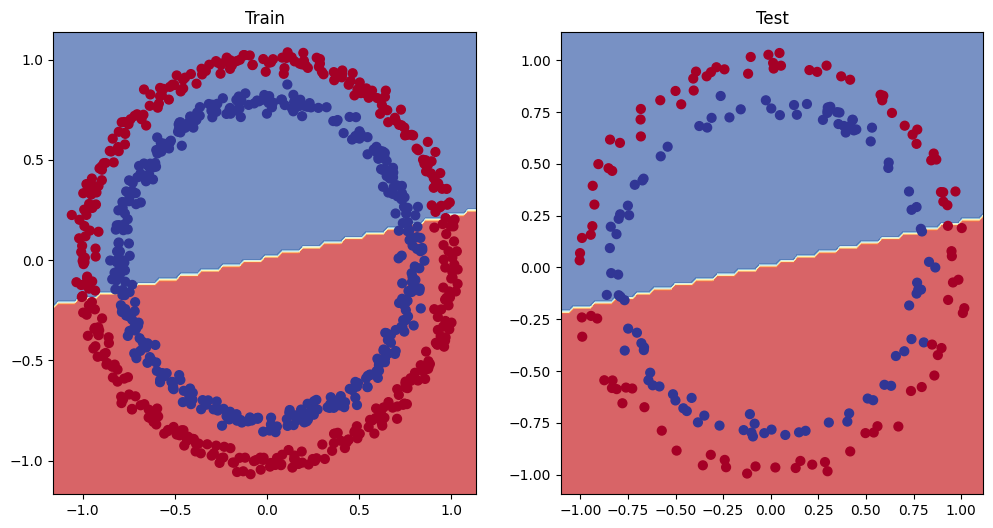

In [ ]:
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Non Linearity

"What patterns could we draw if given a number of infinite staight and non straight lines", or in machine learning terms a very large amount of linear and non linear functions

(1000, 1000, numpy.ndarray, numpy.ndarray)

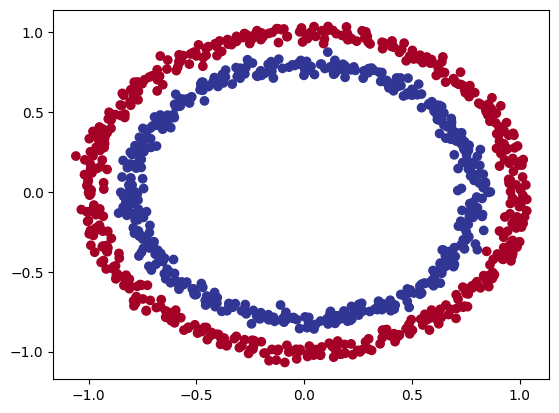

In [ ]:
#Recreating non linear data
#make classification data and get it ready
import sklearn

from sklearn.datasets import make_circles

#make 1000 samples

n_samples=1000

#create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42
                 )

#visualize the dataset
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

len(X), len(y), type(X), type(y)

In [ ]:
#convert data to tensors and train/test split
import torch
from sklearn.model_selection import train_test_split

X= torch.from_numpy(X).type(torch.float)

y= torch.from_numpy(y).type(torch.float)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from pandas._libs.tslibs import Resolution
#build a model with non-linear activation functions
#lets try and improve our model by adding more layers and hidden units
#Create the class of the model
class CircleModelV2(nn.Module):
     def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU() #relu is a non linear activation function

     def forward(self, x):
        #we put the non linear activation function between each layer
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
#lets train that model to see if we get better results

#set loss function and optimizer
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(), lr=0.2)

In [ ]:
#set a manual_seed first to control the randomness
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#fit the data to the target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)


#set up training and testing loops
epochs=1000

for epoch in range(epochs):
  #set the mode to training
  model_3.train()

  #perform forward pass
  y_logit=model_3(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logit))

  #calculate training loss and accuracy
  loss=loss_fn(y_logit, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #step the optimizer
  optimizer.step()

  #now to evaluate our model
  model_3.eval()

  with torch.inference_mode():
    #perform forward pass
    y_test_logit=model_3(X_test).squeeze()
    y_test_pred=torch.round(torch.sigmoid(y_test_logit))

    #calculate training loss and accuracy
    test_loss=loss_fn(y_test_logit, y_test)
    test_acc=accuracy_fn(y_true=y_test, y_pred=y_test_pred)

  #print out whats happening
  if epoch % 100 == 0 :
    print(f"epoch : {epoch}, loss : {loss:.3f}, accuracy : {acc:.2f}, test loss : {test_loss:.3f}, test accuracy :{test_acc:.2f}")

epoch : 0, loss : 0.693, accuracy : 50.00, test loss : 0.693, test accuracy :50.00
epoch : 100, loss : 0.690, accuracy : 53.37, test loss : 0.689, test accuracy :55.50
epoch : 200, loss : 0.685, accuracy : 52.75, test loss : 0.684, test accuracy :56.50
epoch : 300, loss : 0.675, accuracy : 54.37, test loss : 0.673, test accuracy :56.50
epoch : 400, loss : 0.652, accuracy : 63.88, test loss : 0.648, test accuracy :67.50
epoch : 500, loss : 0.569, accuracy : 87.50, test loss : 0.574, test accuracy :86.50
epoch : 600, loss : 0.372, accuracy : 97.88, test loss : 0.407, test accuracy :92.50
epoch : 700, loss : 0.309, accuracy : 87.12, test loss : 0.346, test accuracy :81.50
epoch : 800, loss : 0.095, accuracy : 99.88, test loss : 0.134, test accuracy :99.50
epoch : 900, loss : 0.056, accuracy : 99.88, test loss : 0.085, test accuracy :99.50


In [ ]:
#make some predictions
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y_test[:5]


(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

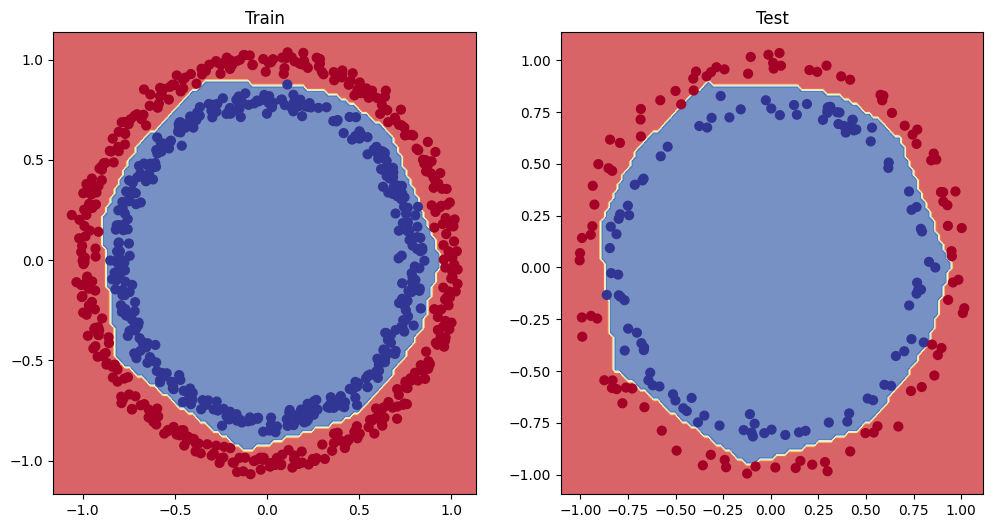

In [ ]:
#plot decision boundary
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
#lets visualize what relu function does
A = torch.arange(-10, 10, 1).type(torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

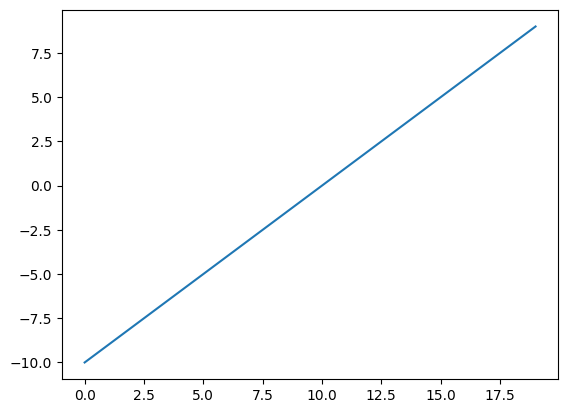

In [ ]:
plt.plot(A)

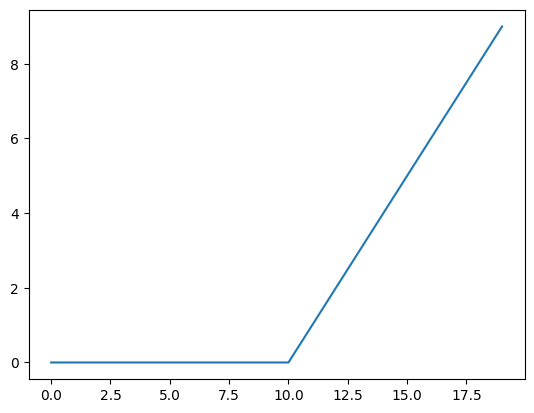

In [ ]:
plt.plot(torch.relu(A))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

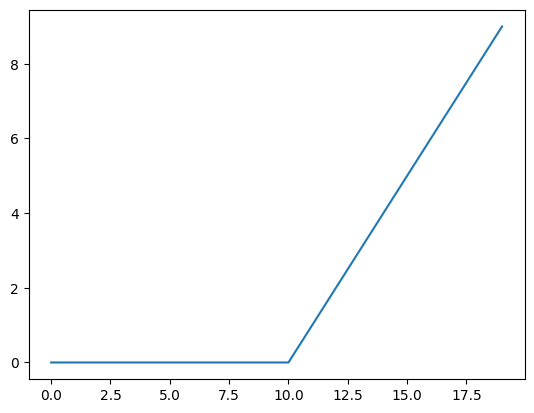

In [ ]:
#relu activation function returns the max out of a tensor input and 0
#lets try and replicate it
def relu(x : torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

plt.plot(relu(A))
relu(A)

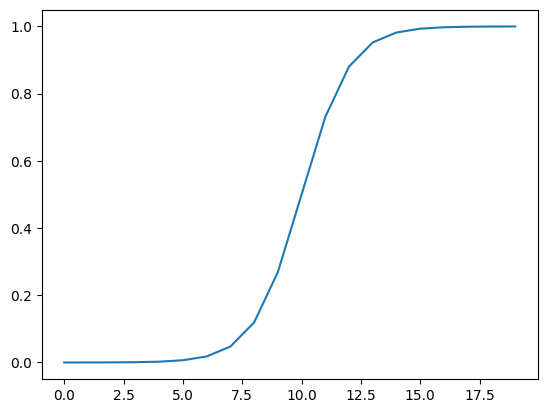

In [ ]:
#now we can do the same for sigmoid activation function
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)
plt.plot(sigmoid(A))

## Putting everyhing together with a multi-class classification
* Binary classification : One thing or another
* Multi-class classificatoin : More than one thing or another

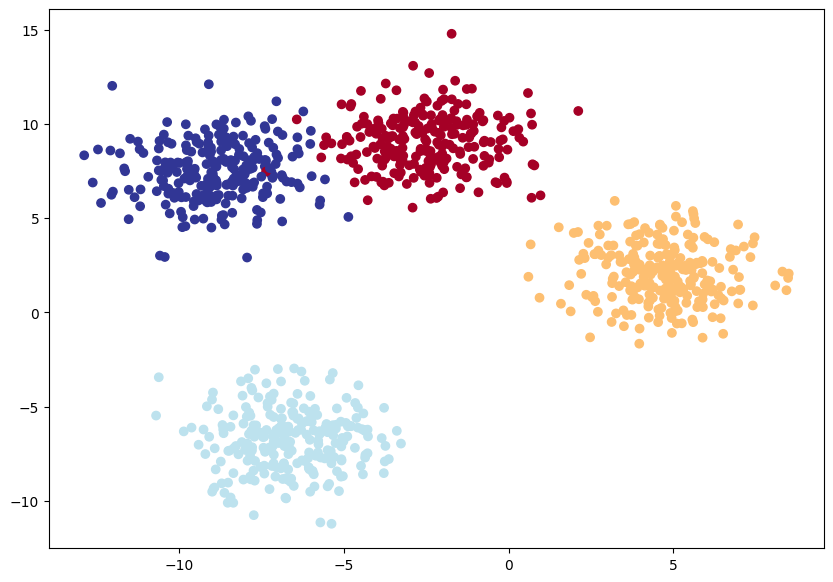

In [ ]:
#import dependencies
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#set hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#create multi-class data

X_blob, y_blob= make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, #gives the clusters a little shake-up
                           random_state=RANDOM_SEED)


#Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[: , 1], c=y_blob, cmap=plt.cm.RdYlBu)

#split into training and testing data
X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size=0.2,
                                                                       random_state=RANDOM_SEED)



## Building  a multiu-class classificaion model in Pytorch


In [ ]:
#Create device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Build the model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_layers=8):
        #initializes model
        #input_features (int) : the number of input features to the model
        #output_features (int) : the number of output features to the model
        #hidden_units: the numer of hidden units between layers
        super().__init__()
        self.linear_layer_stack=nn.Sequential(nn.Linear(in_features=input_features, out_features=8),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_layers, out_features=output_features))
                                   #relu is a non linear activation function

  def forward(self, x):
    #we put the non linear activation function between each layer
    return self.linear_layer_stack(x)


model_4=BlobModel(input_features=2, output_features=4).to(device)
model_4





BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
#set loss function and optimizer
#in multi-class classification we use CrossEntropyLoss as our loss function

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(), lr=0.01)

In [ ]:
#lets try an dmake some predictions

X_blob_train, X_blob_test, y_blob_train, y_blob_test= X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

model_4.eval()
with torch.inference_mode():
  y_blob_logits=model_4(X_blob_test).squeeze()
  y_blob_prob=torch.softmax(y_blob_logits, dim=1)

print(y_blob_logits[:5])
print(y_blob_prob[:5])
#convert from logits to labels



tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
torch.sum(y_blob_prob[0]), torch.max(y_blob_prob[0])

(tensor(1., device='cuda:0'), tensor(0.3244, device='cuda:0'))

In [ ]:
#we use the argmax function to find the max index in each set of 4 outputs
#each index represents a class so the index with the highest probability score is th most likely class
y_blob_pred=torch.argmax(y_blob_prob, dim=1)

y_blob_pred, y_blob_test

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

In [ ]:
y_blob_train[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0], device='cuda:0')

In [ ]:
#creating training and testing loop for a pytorch multiclass problem

#make device agnostic code
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

epochs=100

for epoch in range(epochs):
  #set the mode to train
  model_4.train()

  #perform the forward pass
  y_blob_logits=model_4(X_blob_train)

  #to go from logits to pred we use the softmax activation function and then find the argmax
  y_blob_pred=torch.softmax(y_blob_logits, dim=1).argmax(dim=1)


  #calculate the loss and accuracy
  loss=loss_fn(y_blob_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train, y_pred=y_blob_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

  #evaluate the model
  model_4.eval()

  with torch.inference_mode():
    #perform forward pass
    y_blob_test_logits=model_4(X_blob_test)

    #to go from logits to pred we use the softmax activation function and then find the argmax
    y_blob_test_pred=torch.softmax(y_blob_test_logits, dim=1).argmax(dim=1)

    #calculate the loss and accuracy
    test_loss=loss_fn(y_blob_test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test, y_pred=y_blob_test_pred)

  #print out whats happening
  if epoch % 10 ==0:
    print(f"epoch : {epoch} ,loss : {loss}, test loss : {test_loss} accuracy : {acc}, test accuracy : {test_acc}")


epoch : 0 ,loss : 1.1588265895843506, test loss : 1.1472400426864624 accuracy : 40.375, test accuracy : 38.5
epoch : 10 ,loss : 1.0649319887161255, test loss : 1.0684112310409546 accuracy : 55.375, test accuracy : 50.5
epoch : 20 ,loss : 0.9818968772888184, test loss : 0.99755859375 accuracy : 62.625, test accuracy : 57.49999999999999
epoch : 30 ,loss : 0.9113850593566895, test loss : 0.9360030293464661 accuracy : 70.5, test accuracy : 67.0
epoch : 40 ,loss : 0.8528526425361633, test loss : 0.8834068775177002 accuracy : 88.375, test accuracy : 87.5
epoch : 50 ,loss : 0.8042965531349182, test loss : 0.8385140895843506 accuracy : 92.125, test accuracy : 93.0
epoch : 60 ,loss : 0.7635005116462708, test loss : 0.7998441457748413 accuracy : 93.625, test accuracy : 94.5
epoch : 70 ,loss : 0.7284806966781616, test loss : 0.7659476399421692 accuracy : 94.875, test accuracy : 95.0
epoch : 80 ,loss : 0.6976864337921143, test loss : 0.7355577349662781 accuracy : 95.625, test accuracy : 95.0
epoch

In [ ]:
#make predictions
with torch.inference_mode():
  y_blob_logits=model_4(X_blob_test)

  y_blob_pred=torch.softmax(y_blob_logits, dim=1).argmax(dim=1)

y_blob_pred[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

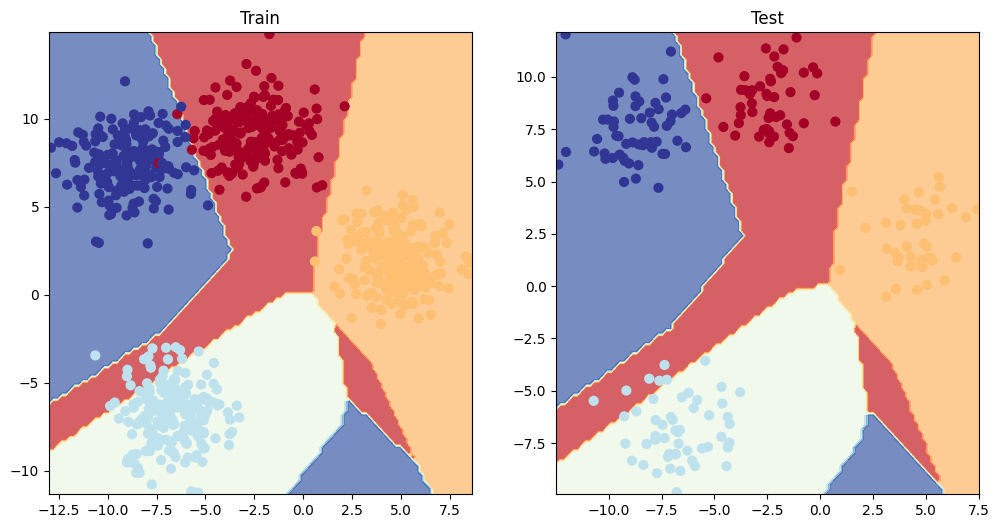

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## Classification Metrics

* Accuracy
* Percision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report

Relative info for when to use percision/recall : https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [ ]:
#we can use either torchmetrics or scikit learn libraries to import different metrics to evaluate our model
from torchmetrics import Accuracy

#note that metrics must be on the same device as data
torch_acc = Accuracy(task='multiclass',
                      num_classes=NUM_CLASSES).to(device)

torch_acc(y_blob_pred, y_blob_test)

tensor(0.9700, device='cuda:0')